# Overview


**Optional Project - Understanding Distributions through Sampling**: 

In this project, I explored advanced Matplotlib plots for four random probability distributions - Normal, Gamma, Exponential, and Uniform. 

My first two visuals served as fun ways to compare individual probability distributions to one another before I explored them all together in the same visual. 
For my first visual, I included a side-by-side comparison of the Normal and Uniform distributions (each sampled with 100 bins) in histogram and heatmap form. 

For my second visualization, I compared the Gamma and Exponential distributions on the same axis, and then animated each distribution separately on corresponding subplots. 


I also compared all four random probability distributions to one another in the same visual. 
For my third visualization, I created a boxplot for the four distributions. I overlaid a histogram of the random Normal Distribution on top of the boxplot, to showcase how one of the distributions looks in histogram form compared to its box plot representation. 

For the fourth visual, I created a simple button GUI to change the display between the four different distributions. I also created an “Exit” button for users to stop the visual’s interactive mode. This fourth visual was a fun way to allow users to engage with the graph and explore the four random probability distributions. 

<br>

**Final Project - Becoming an Independent Data Scientist**: This project was one of my crowning achievements and one of the best opportunities I had to have full-reign over a project during this specialization. The project involved choosing a graph to investigate an assigned topic - weather patterns in Ann Arbor. 

From these guidelines, I designed my project to investigate climate-induced precipitation variations in Michigan. Since climate changes have worsened over the years, including unprecedented storms and droughts, I created visualizations to reveal whether or not climate changes are noticeable in locations that are relatively close to one another.

I created a radar chart to plot the average monthly rainfall and snowfall by inches in Ann Arbor and compared to the two most populous cities in Michigan (Detroit and Grand Rapids). I’ve also interlaid a line graph of the precipitation among the counties which each city belongs to in order to draw further comparison among the three regions. 

Even though the locations were a few hours or less apart from one another, the visuals revealed that there were noticeable variations in weather among the locations. 

This project was definitely one of the hardest assignments I faced throughout the specialization. Despite the challenges I faced, it was one of the most rewarding assignments because I had a chance to design my very own project. It was also my first opportunity to create radio buttons for data analysis.

# Optional Project: Understanding Distributions Through Sampling

This project was not required in order to complete the course; however, it provided me an opportunity to explore random probability distributions in various Matplotlib graphs. 

The requirements were fairly open-ended, so long as I...

* Create a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Create an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.

I also attempted the following bonus:
* **Bonus:** Go above and beyond and look into matplotlib widgets and add a widget which allows for parameterization of the distributions behind the sampling animations.


While this was moreso a creative project, I was given the following tips:

* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. 
* Try to keep the animations at a reasonable time length

<IPython.core.display.Javascript object>


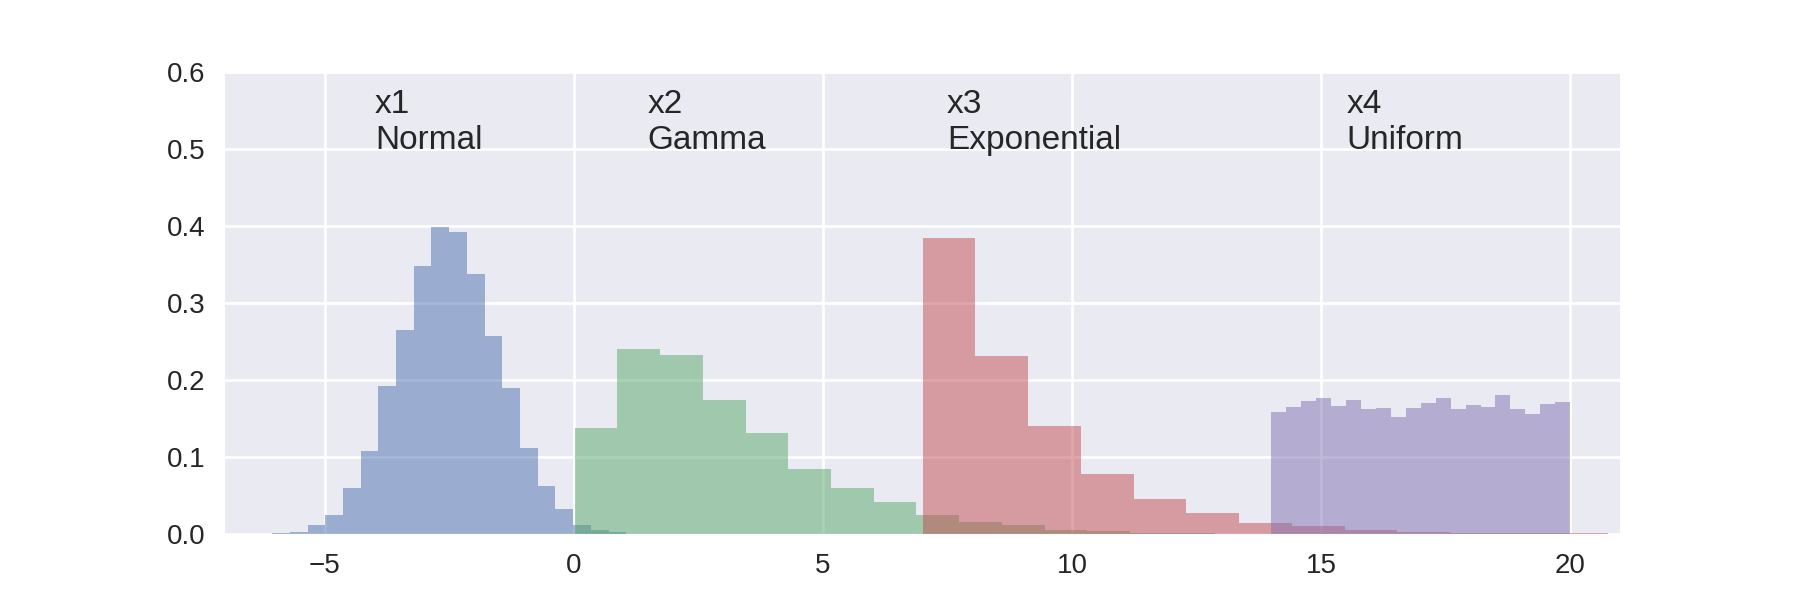

In [18]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook


# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# Visualizations

In [2]:
import matplotlib.gridspec as gridspec
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import matplotlib.patches as mpatches
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

<IPython.core.display.Javascript object>


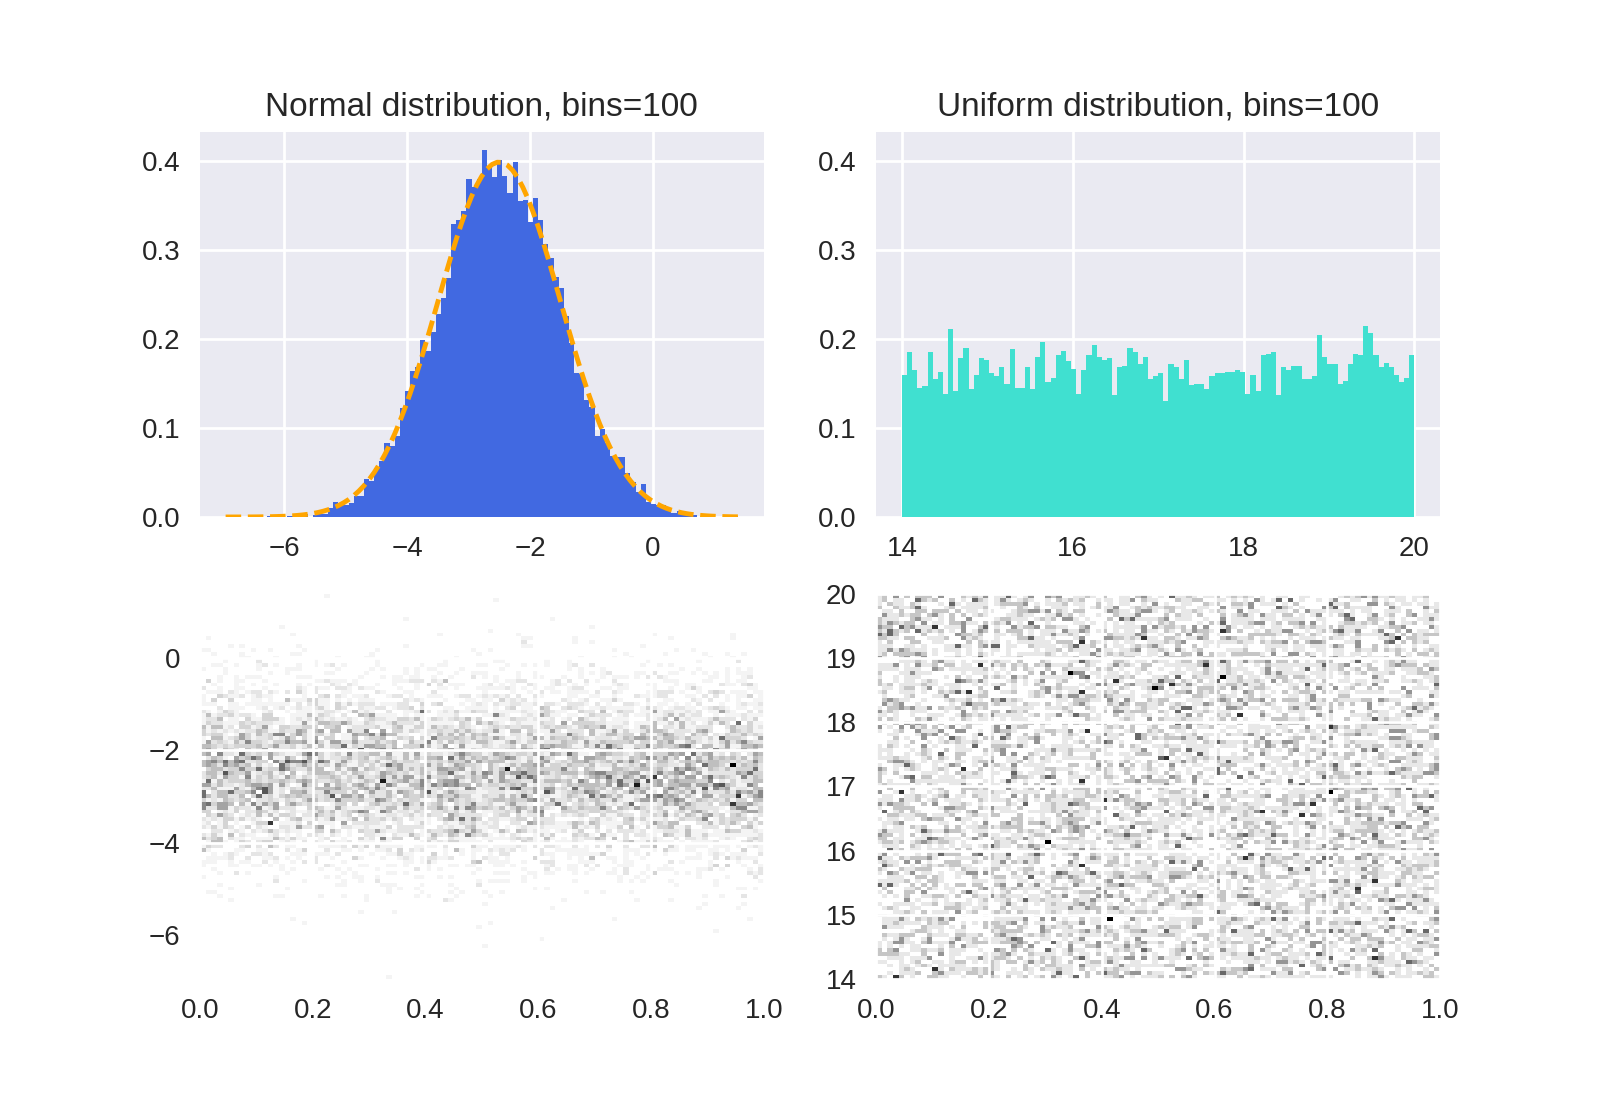

In [17]:
# Use bin size for all figure graphs:
size = 100

# Normal and exponential distributions histograms for them
plt.figure()
norm_x = np.random.random(size=10000)
unif_x = np.random.random(size=10000)


# Histograms
## Normal Distribution
ax1=plt.subplot(2, 2, 1)
n, bins, patches = ax1.hist(x1, normed=True, bins=size, color='royalblue')
ax1.set_title('Normal distribution, bins={}'.format(size))

## Add line of best fit for Normal Distribution
mu = -2.5
sigma = 1
x = mu + sigma * np.random.randn(123)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax1.plot(bins, y, '--r', color='orange')   


## Uniform Distribution
ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.hist(x4, normed=True, bins=size, color='turquoise')
ax2.set_title('Uniform distribution, bins={}'.format(size))

# Heat maps
## Normal Distribution
ax3 = plt.subplot(2, 2, 3)
temp = ax3.hist2d(norm_x, x1, bins=size)

## Uniform Distribution
ax4 = plt.subplot(2, 2, 4, sharex=ax3)
temp = ax4.hist2d(unif_x, x4, bins=size)

<IPython.core.display.Javascript object>


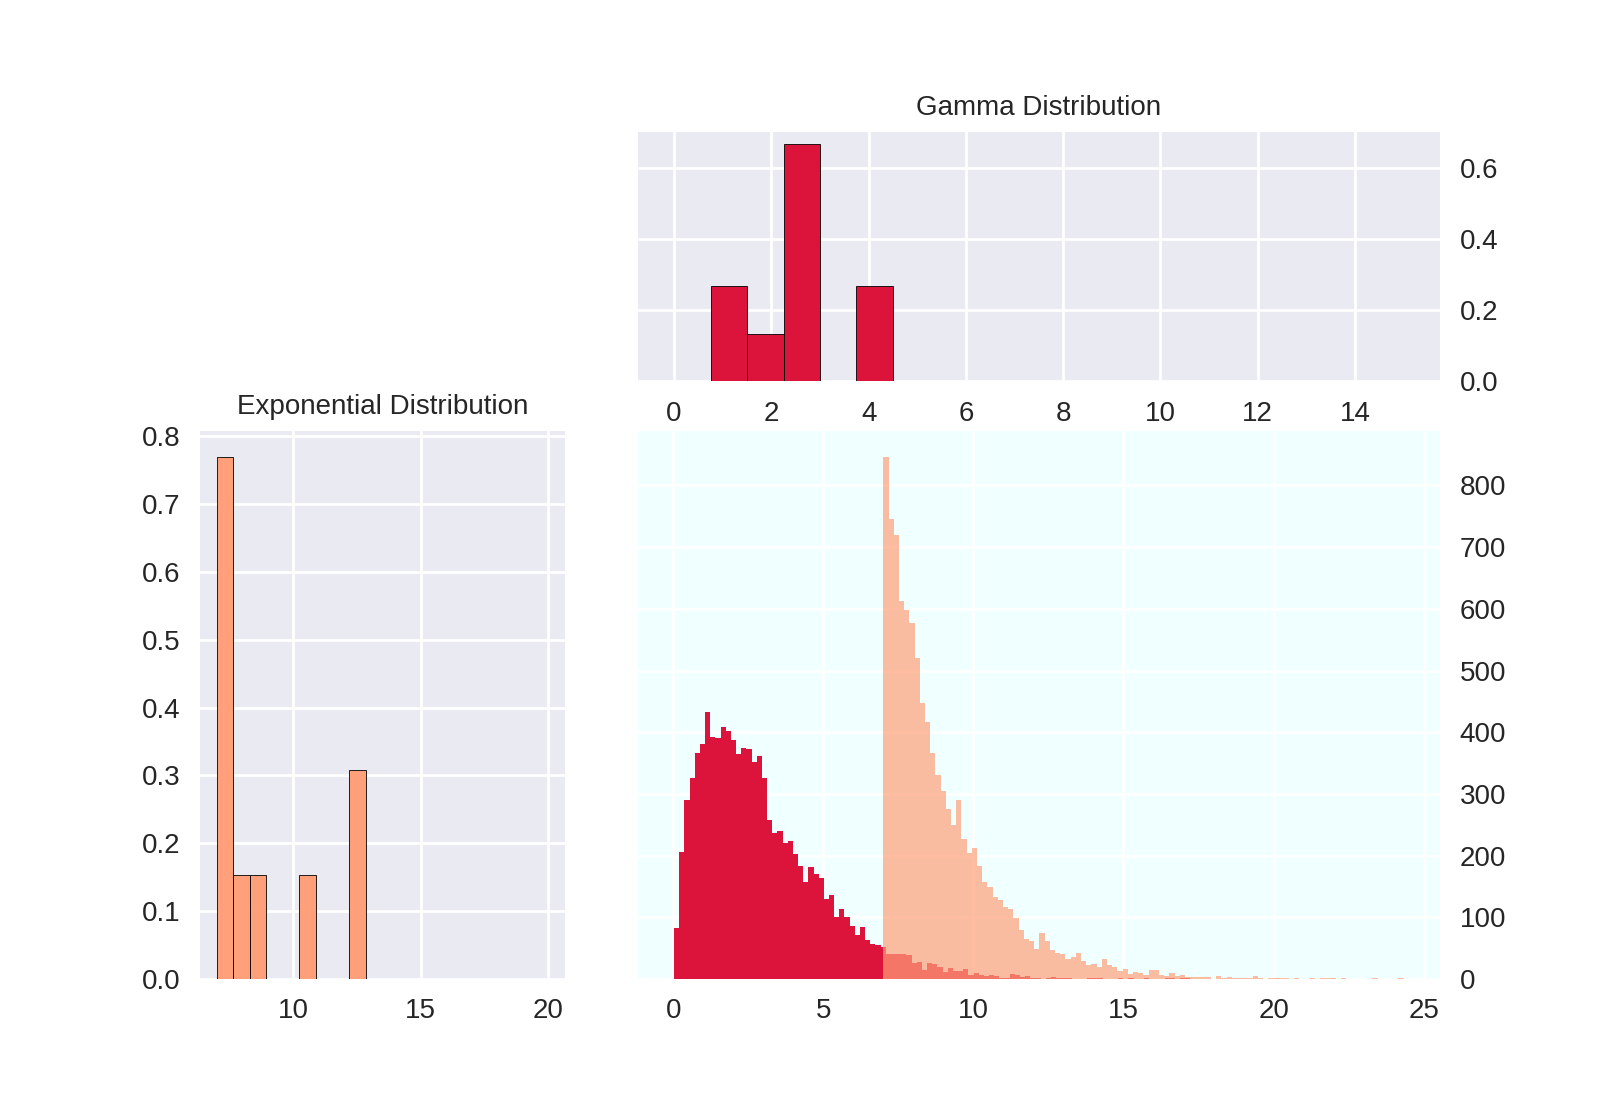

In [16]:
# Gamma and exponential and lineplot of all four distributions, use sideways orientation. Animate only one
plt.figure()

# Define grids
grid = gridspec.GridSpec(3, 3)

top = plt.subplot(grid[0, 1:])
middle = plt.subplot(grid[1:,0])
bottom = plt.subplot(grid[1:, 1:])

# Distribution colors
colors = ['crimson', 'lightsalmon']

# Add all plots to grid space
both = bottom.hist(x2, bins=size, color=colors[0])
bottom.hist(x3, bins=size, alpha=0.7, color=colors[1])
bottom.set_facecolor('azure')

# ALter y-axis of top and bottom graph
top.yaxis.tick_right()
bottom.yaxis.tick_right()


# Add animations to individual distributions
def animate(frame):
    if frame == size:
        picture.event_source.stop()
      
    for grid in (top, middle):
        grid.cla()
        
    top.hist(x2[:frame], normed=True, bins=np.linspace(0, 15, num=21), color=colors[0], edgecolor='black')
    top.set_title("Gamma Distribution", fontsize=10)
        
    middle.hist(x3[:frame], normed=True, bins=np.linspace(7, 20, num=21), color=colors[1], edgecolor='black')
    middle.set_title("Exponential Distribution", fontsize=10)

    
fig = plt.gcf()
picture = animation.FuncAnimation(fig, animate, interval=100)

<IPython.core.display.Javascript object>


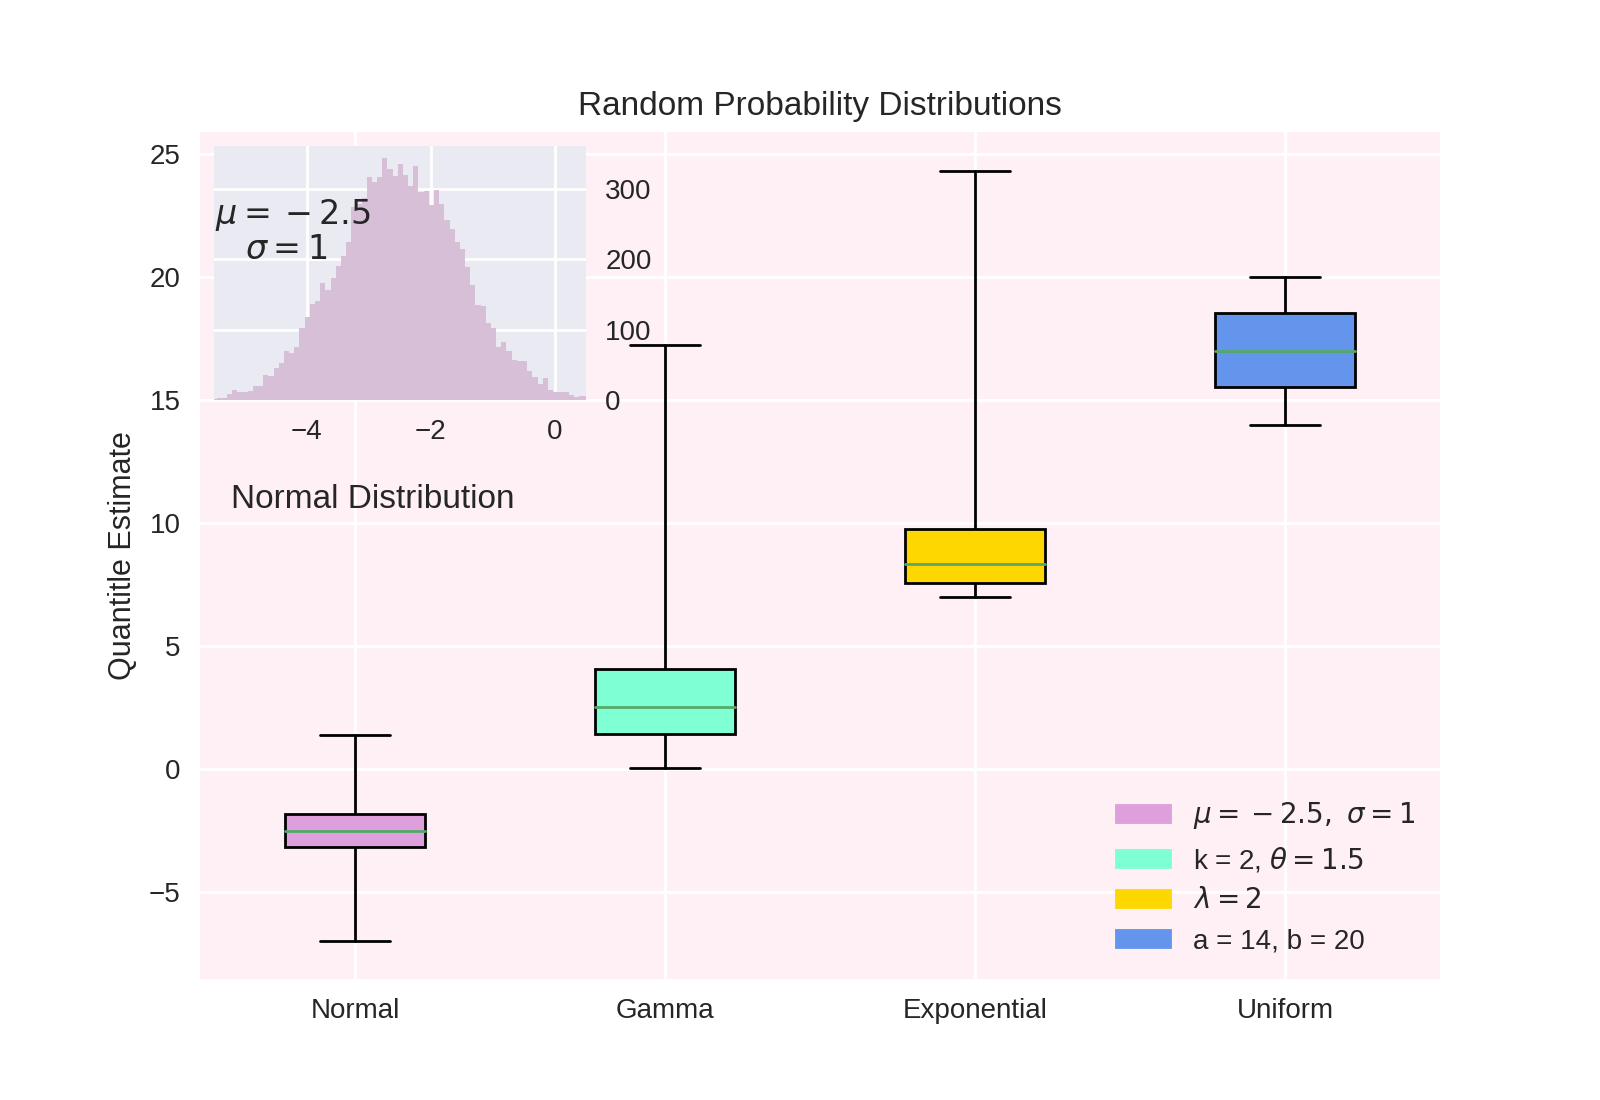

In [15]:
# All 4 distributions, 2 plots each
fig, ax = plt.subplots()

# Use distribution names in future plots as well:
dist = [x1, x2, x3, x4]
names = ['Normal', 'Gamma', 'Exponential', 'Uniform']

# Create boxplot
boxes = plt.boxplot(dist, whis='range', patch_artist=True, labels=names)
ax.set_facecolor('lavenderblush')
ax.set_title('Random Probability Distributions')
ax.set_ylabel('Quantitle Estimate')

# Add color to identify each distributions
coloring_box = ['plum', 'aquamarine', 'gold', 'cornflowerblue']

for artist, color in zip(boxes['boxes'], coloring_box):
    artist.set_facecolor(color)

# Add legend for mean and standard deviation per distribution
box1 = mpatches.Patch(color=coloring_box[0], label=r'$\mu = -2.5,\ \sigma = 1$')
box2 = mpatches.Patch(color=coloring_box[1], label=r'k = 2, $\theta = 1.5$')
box3 = mpatches.Patch(color=coloring_box[2], label=r'$\lambda = 2$')
box4 = mpatches.Patch(color=coloring_box[3], label=r'a = 14, b = 20')
plt.legend(handles=[box1, box2, box3, box4], loc=4)


# Superimpose Normal distribution histogram on boxplot
ax2 = mpl_il.inset_axes(plt.gca(), width='30%', height='30%', loc=2)
ax2.set_xlim(-5.5, 0.5)
ax2.yaxis.tick_right()
norm = ax2.hist(x1, bins=size, color='thistle')


## Display mean and standard deviation of Normal Distribution
ax.text(0.60, 10.60, 'Normal Distribution')
ax2.text(-5.49, 250, r'$\mu =-2.5\ $')
ax2.text(-5, 200, r'$\sigma=1\ $');

# Explore Four Probability Distributions: 

<IPython.core.display.Javascript object>


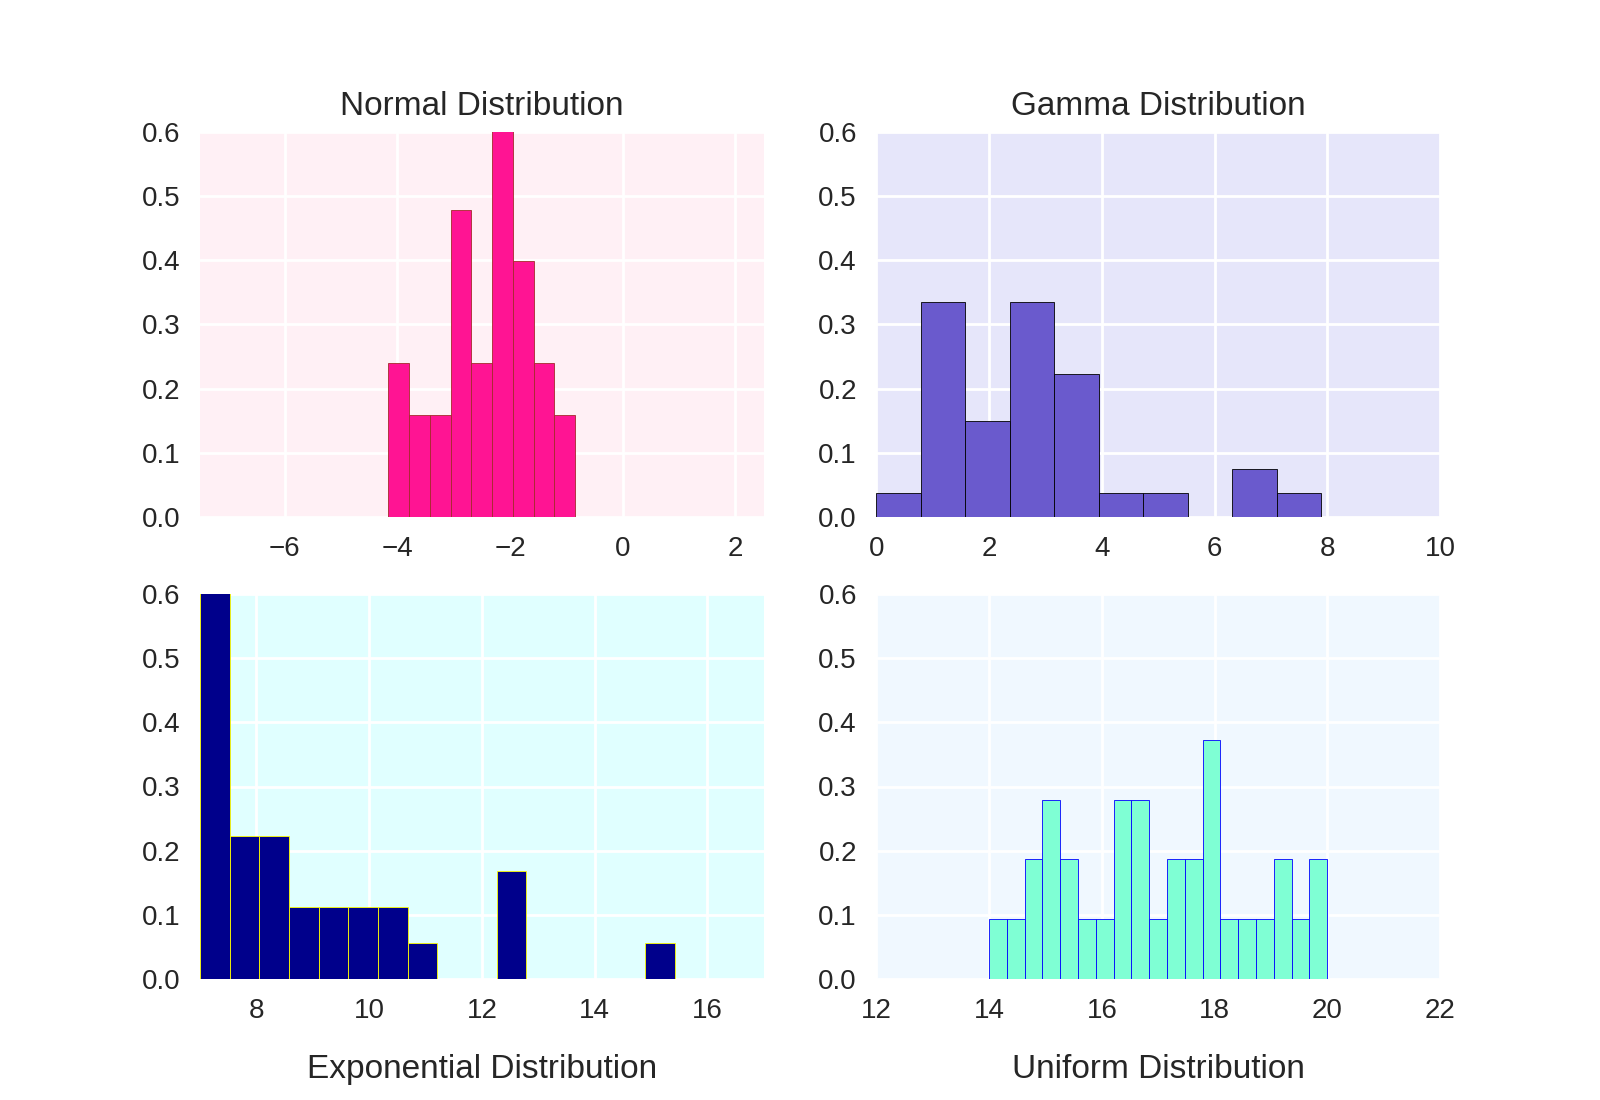

In [14]:
# Task 2 Pl

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Change background color of each histogram
backcolor = ['lavenderblush', 'lavender', 'lightcyan', 'aliceblue']
axis = [ax1, ax2, ax3, ax4]

for i in range(len(backcolor)):
    axis[i].set_facecolor(backcolor[i])

    
# Animation: Axis dimensions, and histogram bin sizes
ax_dim = [[-7.5, 2.5, 0, 0.6], [0, 10, 0, 0.6], [7, 17, 0, 0.6], [12, 22, 0, 0.6]]
lins = [np.linspace(-6, 1, num=20), np.linspace(0, 15, num=20), np.linspace(7, 17, num=20), np.linspace(14, 20, num=20)]

# Bar color and outline
fill = ['deeppink', 'slateblue', 'darkblue', 'aquamarine']
edge = ['brown', 'black', 'yellow', 'blue'] 

# Title axis placement 
title_location = [1, 1, -0.3, -0.3]

def animate(move):
    if move == size:
        moving_picture.event_source.stop()
    
    for i in range(len(axis)):
        axis[i].cla()
        
        axis[i].hist(dist[i][:move], normed=True, bins=lins[i], color=fill[i], edgecolor=edge[i])
        axis[i].set_title(names[i] + ' Distribution', y=title_location[i])
        axis[i].axis(ax_dim[i])
          
moving_picture = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

<IPython.core.display.Javascript object>


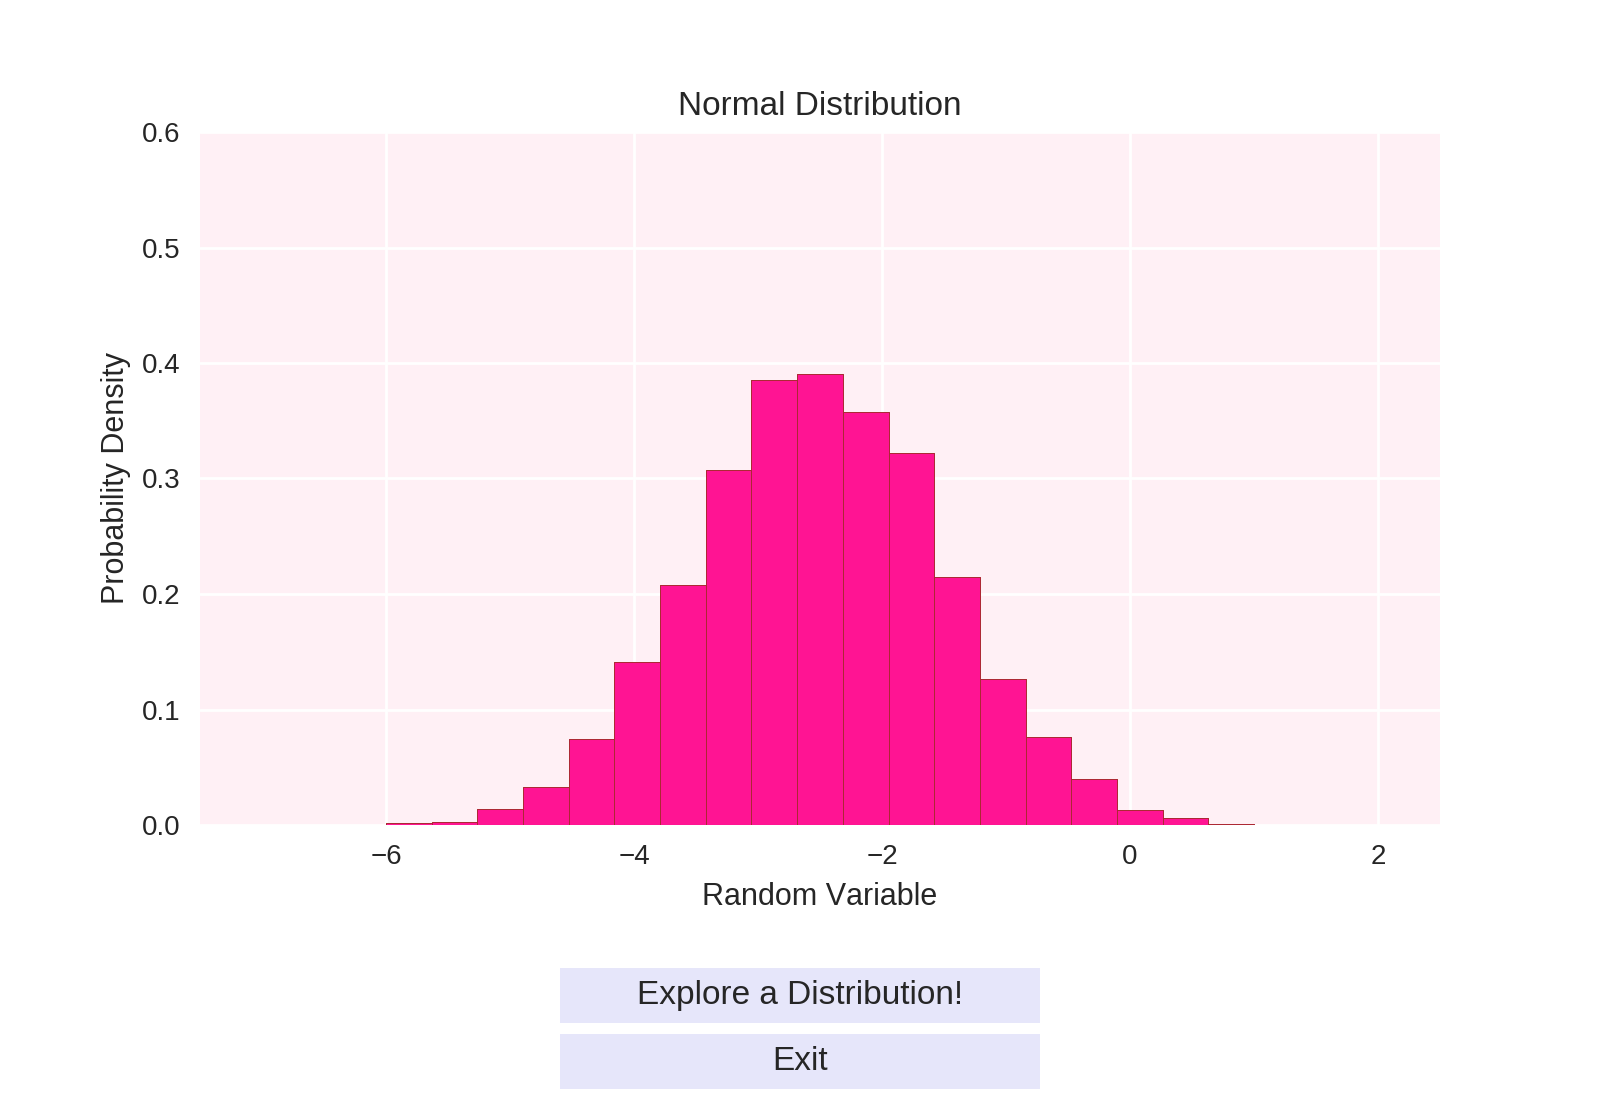

In [13]:
# Note: This figure refers to variables previously declared, primarily in the last visualization 
fig, ax = plt.subplots()

# Make room for buttons!
plt.subplots_adjust(bottom=0.25)
bcolor = 'lavender'

ax.hist(x1, normed=True, bins=lins[0], color=fill[0], edgecolor=edge[0])
ax.set(xlabel='Random Variable', ylabel='Probability Distribution', facecolor=backcolor[0])
ax.axis(ax_dim[0])



# ALlow buttons to change graph display
class Dist: 
    
    index = 1
    
    def explore(self, event):

            ax.cla()

            ax.hist(dist[self.index], normed=True, bins=lins[self.index], color=fill[self.index], edgecolor=edge[self.index])
            ax.set_title(names[self.index] + ' Distribution')
            ax.set(xlabel='Random Variable', ylabel='Probability Distribution', facecolor=backcolor[self.index])
            ax.axis(ax_dim[self.index])

            plt.draw()
            self.index = (self.index+1) % len(dist)

    def exit(self, event):
            plt.close()


# Default graph:
ax.hist(x1, normed=True, bins=lins[0], color=fill[0], edgecolor=edge[0])
ax.set(xlabel='Random Variable', ylabel='Probability Density', title='Normal Distribution', facecolor=backcolor[0])
ax.axis(ax_dim[0])



# Create connection between buttons and distribution graph
callback = Dist()

# Create Explore Button connection
axexplore = plt.axes([0.35, 0.07, 0.30, 0.05])
opt_explore = Button(axexplore, "Explore a Distribution!", color=bcolor)
opt_explore.on_clicked(callback.explore)

# Create Exit Button connection
axexit = plt.axes([0.35, 0.01, 0.30, 0.05])
opt_exit = Button(axexit, "Exit", color=bcolor)
opt_exit.on_clicked(callback.exit);

---
# Final Project: Becoming an Independent Data Scientist

This project was up to my own designs, so long as I met the following loose requirements:

* Find **at least** two datasets on the web which are related, and visualize these datasets to answer a research question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

* Incorporate principles discussed in the first week of the ourse, such as having a high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.


For this project, I analyzed how global warming affects precipiation around Ann Arbor and some of Michigan's other most populated cities - Detroit and Grand Rapids. 

# Climate-induced Precipitation Variations in Michigan, USA

## Research Question:

Climate change has significantly worsened over the years and has caused unexpected weather changes across the globe. The damages of global warming include a significant increase in precipation amidst rising annual temperatures and carbon emission levels. According to the EPA, precipation has increased, on average, 0.17 inches per decade over the contiguous United States. On a larger scale, it is clear to see the affects of global warming due to the frequent rain and disasterous storms popping up throughout the United States. It may be harder, however, to recognize global warming on a smaller scale, such as how climatic change can affect precipitation changes within one's local surroundings. 

For this project, I will explore climate changes on a smaller-scale than is traditionally explored by climate-enthusiasts. By focusing on Ann Arbor, Michigan, this leads us to wonder: *Are there noticabe, climate-induced precipitation changes in Ann Arbor and Michigan's other top populated cities - Detroit and Grand Rapids?*

In [8]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
from matplotlib.widgets import RadioButtons

## For the Line plot: 

In [9]:
washtenaw = pd.read_csv("washtenaw.csv", header=4)
wayne = pd.read_csv("wayne.csv", header=4)
kent = pd.read_csv("kent.csv", header=4)
michigan = pd.read_csv("michigan.csv", header=4)

# Merge dataframes
dfs = [washtenaw, wayne, kent, michigan]
precip = reduce(lambda left, right: pd.merge(left, right, on=['Date'], how = 'outer'), dfs)

# Merge dataframes to display annual precipitation totals (in inches)
precip.columns = ['Year', 'Washtenaw', 'Washtenaw_Anomaly', 'Wayne', 'Wayne_Anomaly', 
                  'Kent', 'Kent_Anomaly', 'Michigan', 'Michigan Anomaly']
precip['Year'] = precip['Year'].astype(str).str[:-2].astype(np.int64)
precip.tail()

,Year,Washtenaw,Washtenaw_Anomaly,Wayne,Wayne_Anomaly,Kent,Kent_Anomaly,Michigan,Michigan Anomaly
115,2015,30.06,-0.49,31.20,-0.07,33.66,-0.10,31.74,0.04
116,2016,33.56,3.01,35.59,4.32,40.66,6.90,35.86,4.16
117,2017,36.02,5.47,35.82,4.55,39.51,5.75,39.27,7.57
118,2018,37.92,7.37,40.16,8.89,41.75,7.99,36.17,4.47
119,2019,37.76,7.21,37.33,6.06,47.91,14.15,41.82,10.12


## For the Radar chart: 

In [10]:
# Compare Ann Arbor to MI's top 2 populated cities (acc. to 2010 U.S. Census): Detroit & Grand Rapids
# For each city, obtain 1981-2010 average precipitation and snowfall per month
avgAnn = pd.read_csv("averagesUMich.csv")
avgDetroit = pd.read_csv("averagesDetroit.csv")
avgGrand = pd.read_csv("averagesGrandRapids.csv")
# This dataframe needed extra cleaning up:
avgGrand = avgGrand.iloc[0:12, :]

month = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

# Create a cleaned, precipitation dataframe for each city
def find_precip(df):

    # Keep only monthly rainfall and snowfall data for accumulation (both in inches) 
    # Data also for number of days where rainfall > 0.1 inches and snowfall > 0.01 inches
    avg = df[['MLY-PRCP-NORMAL', 'MLY-PRCP-AVGNDS-GE001HI', 
                 'MLY-SNOW-NORMAL', 'MLY-SNOW-AVGNDS-GE001TI']].dropna()
    avg.index = month

    # Note: Measurements are for liquid (melted snow and rain) and solid (snow) precipitations
    ## Rename liquid precipitation simply 'rainfall' and solid precipitation as 'snowfall'
    avg.rename(columns={'MLY-PRCP-NORMAL': 'Rainfall', 'MLY-SNOW-NORMAL': 'Snowfall',
                        'MLY-PRCP-AVGNDS-GE001HI': 'Raindays', 'MLY-SNOW-AVGNDS-GE001TI': 'Snowdays'},
               inplace=True)

    # Change negative measurements to zero
    ## Contains special value "-7777: a non-zero value that would round to zero", acc. to documentation
    avg.where(avg >= 0, 0, inplace=True)

    # Round up days of precipitation to a whole number
    avg['Raindays'] = avg['Raindays'].apply(np.ceil)
    avg['Snowdays'] = avg['Snowdays'].apply(np.ceil)
    
    return avg

# Obtain cleaned dataframes. Grand Rapids displayed as a sample
ann = find_precip(avgAnn)
detroit = find_precip(avgDetroit)
grand = find_precip(avgGrand); grand

,Rainfall,Raindays,Snowfall,Snowdays
Jan.,2.09,16.0,20.8,15.0
Feb.,1.79,13.0,14.8,11.0
Mar.,2.37,12.0,8.3,7.0
Apr.,3.35,13.0,1.8,2.0
May,3.98,12.0,0.0,1.0
June,3.77,11.0,0.0,0.0
July,3.78,10.0,0.0,0.0
Aug.,3.59,10.0,0.0,0.0
Sept.,4.28,11.0,0.0,0.0
Oct.,3.26,12.0,0.5,1.0


<IPython.core.display.Javascript object>


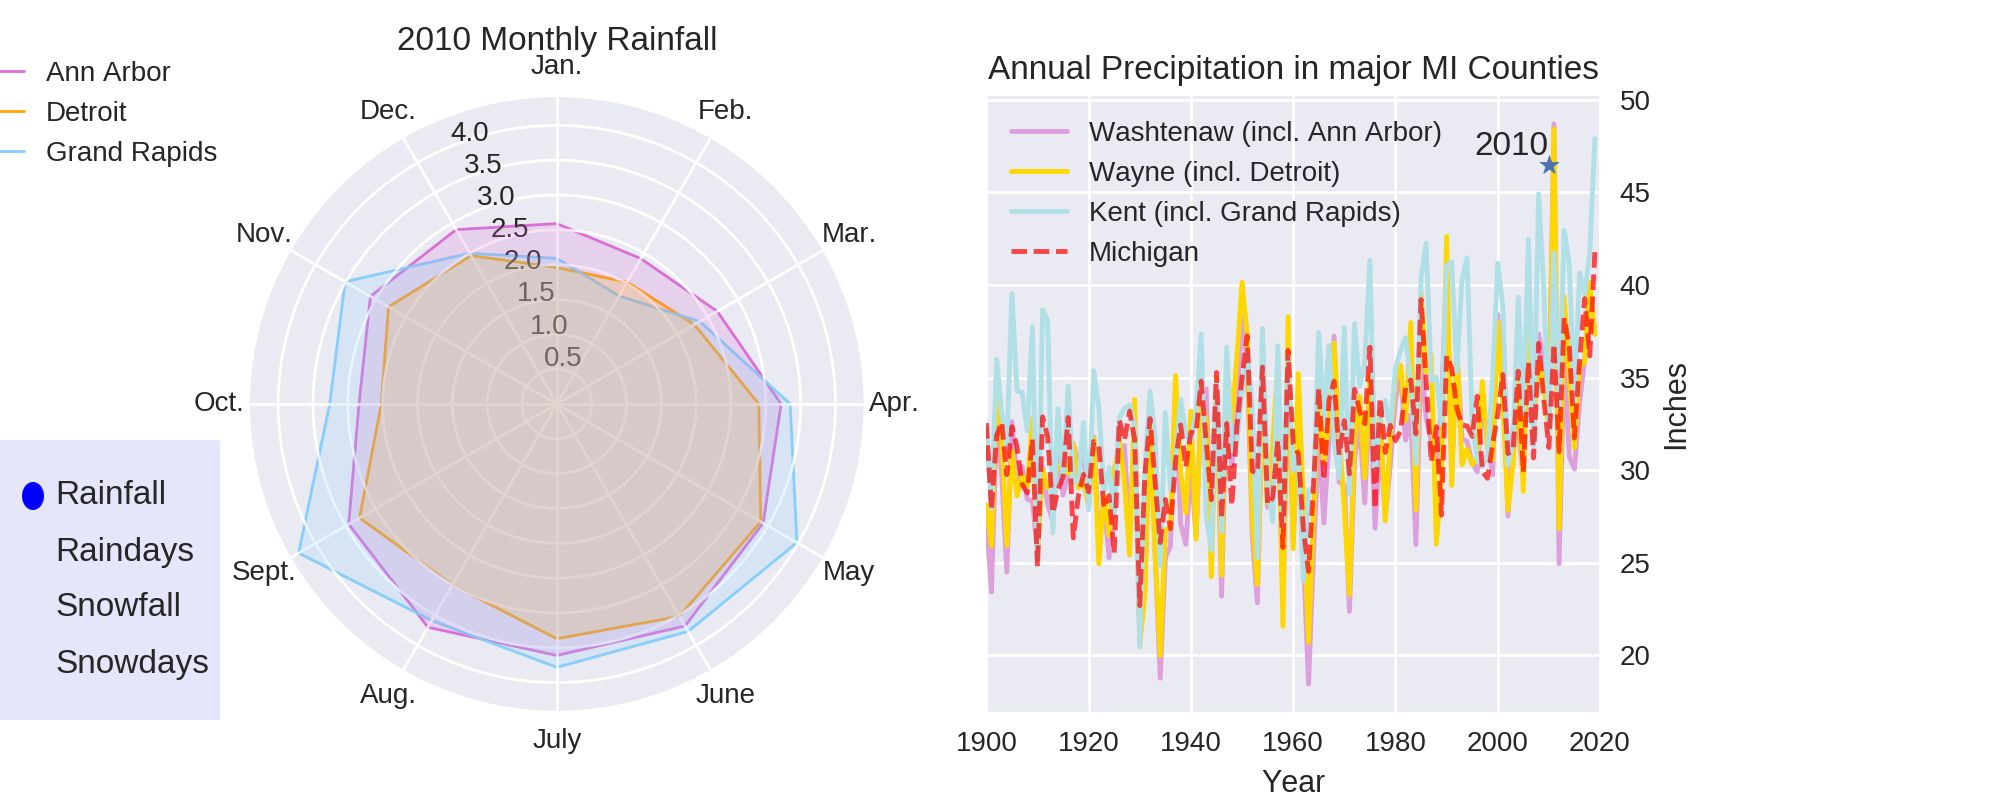

In [11]:
# Create plot
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1, polar=True)

# Divide radar chart by degrees in a circle. Let initial degrees represent months
num = len(month)
degrees = np.linspace(0, 2 * np.pi, num, endpoint=False).tolist()
degrees += degrees[:1]

# Radio button to select data displayed on radar chart:
weatherax = plt.axes([0.00, 0.10, 0.11, 0.35], facecolor='lavender')
weather_button = RadioButtons(weatherax, ("Rainfall", "Raindays", 'Snowfall', 'Snowdays'))


# Radar chart
def create_radar(cityinfo, shade, cityname):

    # Default radio button selection
    weather = 'Rainfall'

    # Precipitation variables for each radar chart:
    precip_list = cityinfo[weather].tolist()
    # To match plot, make data circular by attaching initial value to the last value:
    precip_list += precip_list[:1]

    ax1.plot(degrees, precip_list, color=shade, linewidth=1, zorder=0, label=cityname)
    ax1.fill(degrees, precip_list, color=shade, alpha=0.2)
    ax1.set_title('2010 Monthly ' + weather)

    plt.draw()
    
    
def axis_setters():
    # Make axis labels begin at zero degress, in the clockwise direction.
    ax1.set(theta_zero_location='N', theta_direction=-1, rlabel_position=-22.5)
    
    # Change axis degrees into months
    ax1.set_thetagrids(np.degrees(degrees), month)
    ax1.legend(loc='upper left', bbox_to_anchor=(-0.50, 1.10));
    
    
# Attributes of each city 
city_info = [ann, detroit, grand]
shade = ['orchid', 'orange', 'lightskyblue']
city_name = ['Ann Arbor', 'Detroit', 'Grand Rapids']

# Allow radio button to customize radar chart
def radio(button):
    
    # Clear each time button is pressed so only one precipitation type is displayed
    ax1.cla()
    
    ## As before, make data circular by attaching first and last value
    for i in range(len(city_info)):
        precip_list = city_info[i][button].tolist()
        precip_list += precip_list[:1]
        ax1.plot(degrees, precip_list, color=shade[i], linewidth=1, zorder=0, label=city_name[i])
        ax1.fill(degrees, precip_list, color=shade[i], alpha=0.2)

    ax1.set_title('2010 Monthly ' + button)
    
    ## Alter axis to polar coordinates
    axis_setters()    
    
    plt.draw()
    
weather_button.on_clicked(radio)


# Plot cities
## City 0: Ann Arbor
create_radar(city_info[0], shade[0], city_name[0]); 
## City 1: Detroit
create_radar(city_info[1], shade[1], city_name[1])
## City 2: Grand Rapids
create_radar(city_info[2], shade[2], city_name[2])

# Alter axis to polar coordinates
axis_setters()

In [12]:
ax2 = plt.subplot(1, 2, 2)
plt.subplots_adjust(right=0.80)

# Note: Clear is helpful when Jupyter notebook linegraph is recalled
ax2.cla()

# Lineplot
ax2.plot(precip['Year'], precip['Washtenaw'], label='Washtenaw (incl. Ann Arbor)', color='plum')
ax2.plot(precip['Year'], precip['Wayne'], label='Wayne (incl. Detroit)', color='gold')
ax2.plot(precip['Year'], precip['Kent'], label='Kent (incl. Grand Rapids)', color='powderblue')
ax2.plot(precip['Year'], precip['Michigan'], label='Michigan', ls='--', alpha=0.7, color='red')
ax2.set(title='Annual Precipitation in major MI Counties', xlabel='Year', xlim=(1900, 2020), ylabel='Inches')

# Label the year 2010, to aid comparison to radar chart
ax2.scatter(x=2010, y=46.5, marker='*', zorder=3)
ax2.text(x=2010, y=47, s='2010', horizontalalignment='right')

# Flip y-axis to not interfere with radar chart
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

# Add county legend
ax2.legend();

# Analysis:

Throughout this project, I aimed to highlight the changes in precipitation among three Michigan locations. Since there may already exist differences in precipitation throughout Michigan, I compared three different cities to each other: Ann Arbor (Washtenaw County), Detroit (Wayne County), and Grand Rapids (Kent County). While designing the visualizations for this project, I strived to adhere to Alberto Cairo's principles of truth, beauty, function, and insight, as outlined in *Graphic Lies, Misleading Visuals*. These principles helped me to design meaningful, unbiased visuals so viewers can form a clear interpretation of the graphs. I also strived to create graphs that were interactive and concise while displaying four different measures for precipitation change: 
    * Rainfall (in inches) 
    * Raindays (in days)
    * Snowfall (in inches)
    * Snowdays (in days)

The radar chart was vital in illustrating the monthly precipitation differences among each county. Plotting each location for the same year (2010) ensured that unbiased comparison could be made among each location. The radar chart was helped in displaying monthly differences among each location, as the chart was divided into twelve segments (for months). The radio button reduced the amount of information displayed at once. This helped create a simpler visual so users could interact and choose the precipitation form that would be displayed and not become easily distracted by an overabundance of data.

While the radar chart was very specific and allowed users to see climate changes over the course of a year, the line plot showed the rising climatic changes induced over a century's time (Jan. 1900 - Dec. 2019). The line plot included overall annual precipitation data for each county the three cities were located. In addition, the state average line was included as a baseline to show how varied precipitation throughout Michigan is. Yet despite some locations getting on average more precipitation than others (e.g. Grand Rapids vs. Ann Arbor), there is a clear upward trend among all locations. This proved that despite annual cyclical changes in weather, precipitation was overall increasing throughout all locations. The spikes in the data also tended to become larger over the course of the century. These fluctuations demonstrate that not only is precipitation changes occuring, but they are becoming more varied and unpredictable compared to previous trends. 

***
***
When designing graphic visuals, Cairo advocates "to minimize harm that graphic lies and mistakes have...do to society." Both the line plot and radar chart were carefully designed to be as clear and unbiased as possible while highlighting the changes in precipitation. 

a) Truthfulness can be achieved by not hiding and distorting the data when designing a graph. With the line plot, I tried to leverage my three regions I used for comparison with a baseline - the state average line. This was represented in a hashed line that stood out from the other solid-marked locations, so viewers could have a reference line for comparing the other locations. With the radar chart, I used the same source of data from the National Oceanic and Atmospheric Administration (NOAA), as I had used for all of my line plot data. This single data source preserved the unbiased quality of my data, since I did not use mixed sources that could have collected data differently from one another.

b) On the principle of beauty, Cairo does purport the importance of visual appeal to attract an audience, but not at the cost of "integrity of information." In essence, conciseness was key for my design. For the line plot, I made each line have a strikingly different hue from one another so each location could be clearly distinguished. I chose a line plot to best capture the continuous, time series component of my data, since I plotted the inches of precipitation against years. For my radar plot, I used polar coordinates to divide each radar segment into months, since time is continuous, like a circle. This design also allowed me to plot monthly precipitation data in a unique way.

c) On functionality, Cairo advises against displaying too much data at once, since overabundance can weaken the effectiveness of the visual while misleading viewers. Including two plots is indeed a risk, but I strived to provide a connecting link between the two through a star point on the line plot that indicates where the data from the radar chart approximately lies. Since the data is collected from the same source, it is safe for viewers to draw comparisons from the two charts simultaneously. For the line plot, a legend was key to showing where each city lied on the plot, since I had used available county precipitation data. I also flipped the lineplot's y-axis so it could be clearly read without overlapping with the radar chart. For the radar chart, I plotted four forms of precipitation, since I was basing my radar chart by month and weather is heavily influenced by seasonal changes (e.g. snow prevalent in winter, and rain typically during the rest of the year). The radio button allowed the user to choose between different forms of precipitation, without having to be overwhelmed with four types of data displayed at once. 

d) On the whole, visuals ought to be insightful, as Cairo explains, by not being based on isolated statistics that misrepresent reality in accordance to the graphic designer's intent. I tried to design the visuals to focus on precipitation, not with the aim of answering my research question in a particular vein. The line plot has data collected over a century's time, rather than a few short years that highlight rapid climatic changes. While the radar chart is designed to be specific and only focuses on one year (due to data availability), the intent is moreso to examine any finer details that distinguish each region over the course of a year. The radar chart also has useful options for looking at different forms of precipitation while comparing the three cities to one another. These options allow users to compare each city at different times of the year.
***
***

Together, both the radar chart and line plot are powerful tools for analyzing precipitation, by providing a close-up and holistic lens to analyze climate-induced changes in precipitation. The radar chart's radio button also provide greater access to how different forms of precipitation affect a city. For instance, the visual shows that Ann Arbor tends to have the most rain and snow days per month, while Grand Rapids has a greater amount of rainfall and snowfall accumulation each month. These observations are particularly striking, since the line plot highlights Grand Rapids as surpassing the other locations in precipitation per year. I also included a star on the line plot for the year 2010. That way, viewers can easily compare the overall 2010 precipitation trends on the line plot to the more specific climate changes displayed on the 2010 radar chart. In conjunction, both visuals reveal how precipitation affects each location in a discernibly different way from one another. These precipitation variations contrasts with one's intuition that nearby locations' weather would be affected similarly by climate changes, considering the plotted locations are separated by a mere couple of hours or less from one another. This further proves how climatic change has conspicuous effects even in one's geographical area. 

Overall, both graphs help show that climate change is a real concern and is even noticeable among cities located relatively close to one another. Hopefully this project will inspire viewers to be cognizant of climate change within their own community :)

# References and Datasets:

## Research question:
https://www.epa.gov/climate-indicators/climate-change-indicators-us-and-global-precipitation#:~:text=On%20average%2C%20total%20annual%20precipitation,of%200.17%20inches%20per%20decade

## General (Line plot):
https://www.ncdc.noaa.gov/cag/county/time-series

## Line plot: Counties
Washtenaw County: https://www.ncdc.noaa.gov/cag/county/time-series/MI-161/pcp/12/12/1900-2020?base_prd=true&begbaseyear=1900&endbaseyear=2020&filter=true&filterType=binomial

Wayne County: https://www.ncdc.noaa.gov/cag/county/time-series/MI-163/pcp/12/12/1900-2020?base_prd=true&begbaseyear=1900&endbaseyear=2020&filter=true&filterType=binomial

Kent County: https://www.ncdc.noaa.gov/cag/county/time-series/MI-081/pcp/12/12/1900-2020?base_prd=true&begbaseyear=1900&endbaseyear=2020&filter=true&filterType=binomial

## Line plot: Michigan state average:
https://www.ncdc.noaa.gov/cag/statewide/time-series

## General (Radar chart):
https://www.ncdc.noaa.gov/cdo-web/datatools/normals 

## Radar chart: Cities
Use CSV format, select all months for the year 2010. Customize to add precipitation data. 
For a quick pdf format, use the link and click: "View Station Data" -> "2010" -> "View Data"


Ann Arbor: https://www.ncdc.noaa.gov/cdo-web/datasets/normal_mly/stations/GHCND:USC00200228/detail

Detroit: https://www.ncdc.noaa.gov/cdo-web/datasets/normal_mly/stations/GHCND:USW00094847/detail

Grand Rapids: https://www.ncdc.noaa.gov/cdo-web/datasets/normal_mly/stations/GHCND:USW00094860/detail